Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.7253 - loss: 0.5171 - val_accuracy: 0.8650 - val_loss: 0.2986
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.8932 - loss: 0.2594 - val_accuracy: 0.9280 - val_loss: 0.1797
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9220 - loss: 0.1912 - val_accuracy: 0.9415 - val_loss: 0.1685
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9443 - loss: 0.1461 - val_accuracy: 0.9375 - val_loss: 0.1661
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.9551 - loss: 0.1176 - val_accuracy: 0.9365 - val_loss: 0.1819
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9580 - loss: 0.1028 - val_accuracy: 0.9545 - val_loss: 0.1344
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9720 - loss: 0.0703 - val_accuracy: 0.9430 - val_loss: 0.1554
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9800 - loss: 0.0578 - 

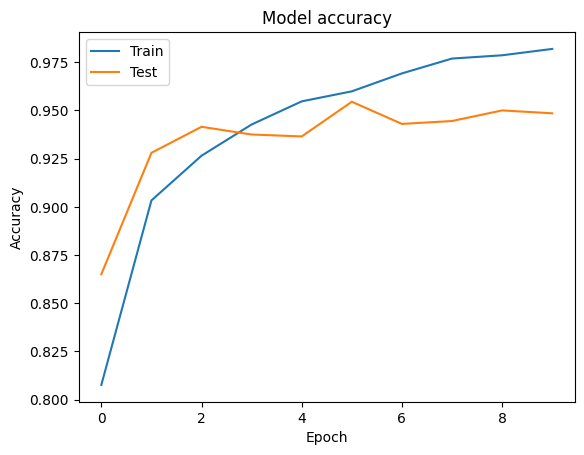

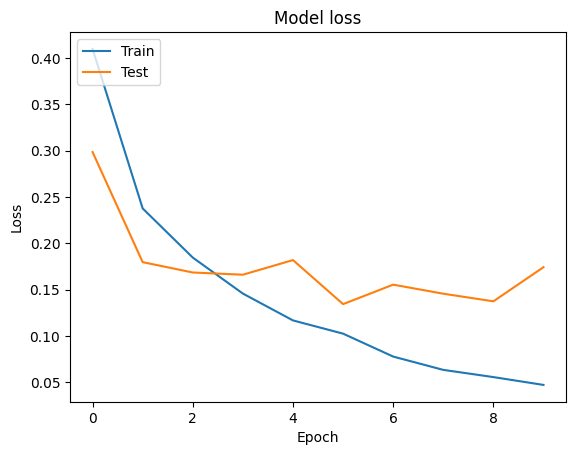

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1. Import the necessary libraries
import numpy as np

# 2. Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Convert the labels to binary (0 for airplane, 1 for automobile)
binary_train_indices = np.where((train_labels == 0) | (train_labels == 1))[0]
binary_test_indices = np.where((test_labels == 0) | (test_labels == 1))[0]

train_images_binary = train_images[binary_train_indices]
train_labels_binary = train_labels[binary_train_indices]
test_images_binary = test_images[binary_test_indices]
test_labels_binary = test_labels[binary_test_indices]

# Normalize pixel values to be between 0 and 1
train_images_binary, test_images_binary = train_images_binary / 255.0, test_images_binary / 255.0

# Convert labels to 0 and 1
train_labels_binary = (train_labels_binary == 1).astype(int)
test_labels_binary = (test_labels_binary == 1).astype(int)

# 3. Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 4. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
history = model.fit(train_images_binary, train_labels_binary, epochs=10,
                    validation_data=(test_images_binary, test_labels_binary))

# 6. Evaluate the model
test_loss, test_acc = model.evaluate(test_images_binary, test_labels_binary, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [4]:
import os
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))